# Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from tqdm.notebook import tqdm

from gmm import gmm_sample, gmm_density
from kernels import Gaussian
from kernel_herding import KernelHerding

# One-dimensional

## Generate data

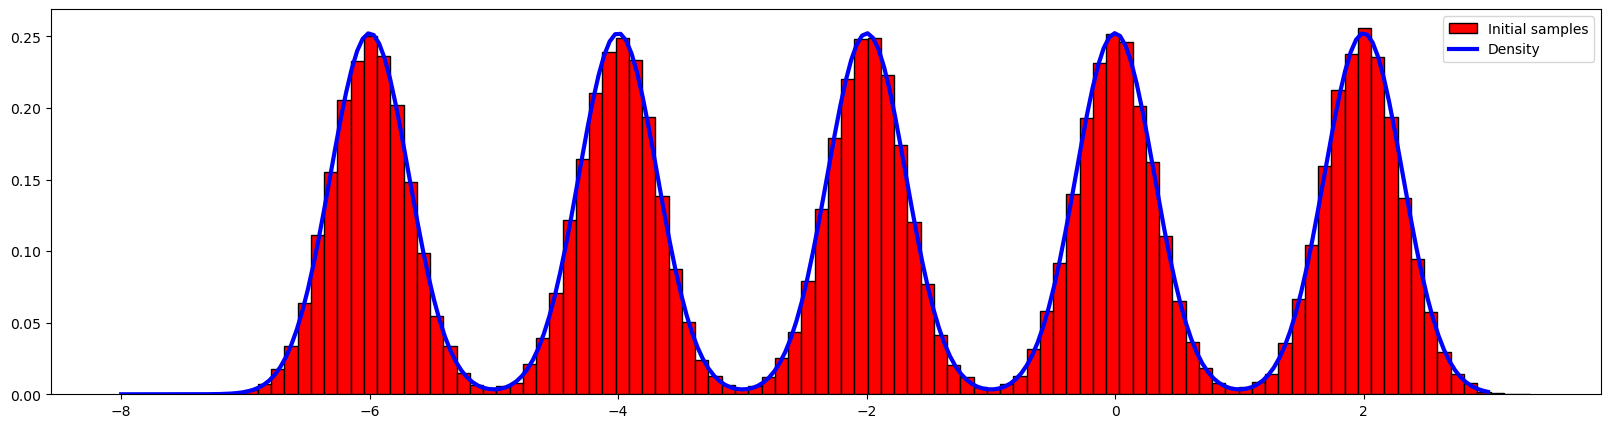

In [12]:
probs = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
mus = np.array( ([-6], [-4], [-2], [0], [2] ) )
covs = np.array( [ [0.1], [0.1], [0.1], [0.1], [0.1]])

D = gmm_sample(probs, mus, covs, 10000)

m = 250
x = np.linspace(-8, 3, m)
f = np.zeros(m)
for i in range(m):
    f[i] = gmm_density(x[i], probs, mus, covs)

plt.figure( figsize = (20, 5) )
plt.hist(D, ec = 'black', bins = 100, density = True, label = 'Initial samples', color = 'red')
plt.plot(x, f, color = 'blue', label = 'Density', linewidth = 3)
plt.legend()
plt.show()

## Run Kernel herding

In [13]:
lengthscale = 0.5
kernel = Gaussian(lengthscale)
kh = KernelHerding(D, kernel)

In [16]:
# method = ('local' , False)
method = ('global', 'BFGS', 10)

def linear(x):
    return x

def square(x):
    return x**2

def cube(x):
    return x**3

#def sin(x):
#    return np.sin(np.linalg.norm(x, axis = 0))

error_funcs = [linear, square, cube]

runs = 5
M = 1000
herd_error = np.zeros((len(error_funcs), runs, M))
iid_error = np.zeros((len(error_funcs),runs, D.shape[0]))
for i in range(runs):
    # Build coreset
    kh.reset()
    kh.herd(M, method)
    for j, func in enumerate(error_funcs):
        # Compute errors
        herd_error[j, i, :] = kh.compute_herd_error(func)
        iid_error[j, i, :] = kh.compute_iid_error(func)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Plot results

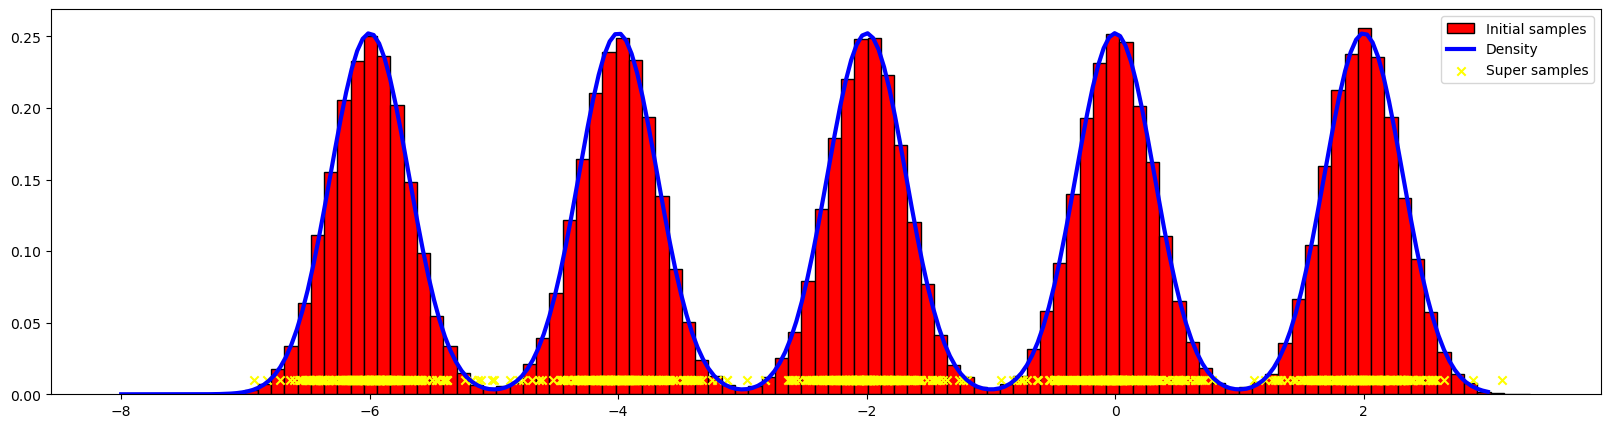

In [17]:
first = 1000

plt.figure( figsize = (20, 5) )
plt.hist(D, ec = 'black', bins = 100, density = True, label = 'Initial samples', color = 'red')
plt.plot(x, f, color = 'blue', label = 'Density', linewidth = 3)
plt.scatter(kh.super_samples[:first], [0.01]*np.ones(first), marker = 'x', color = 'yellow', label = 'Super samples')
plt.legend()
plt.show()

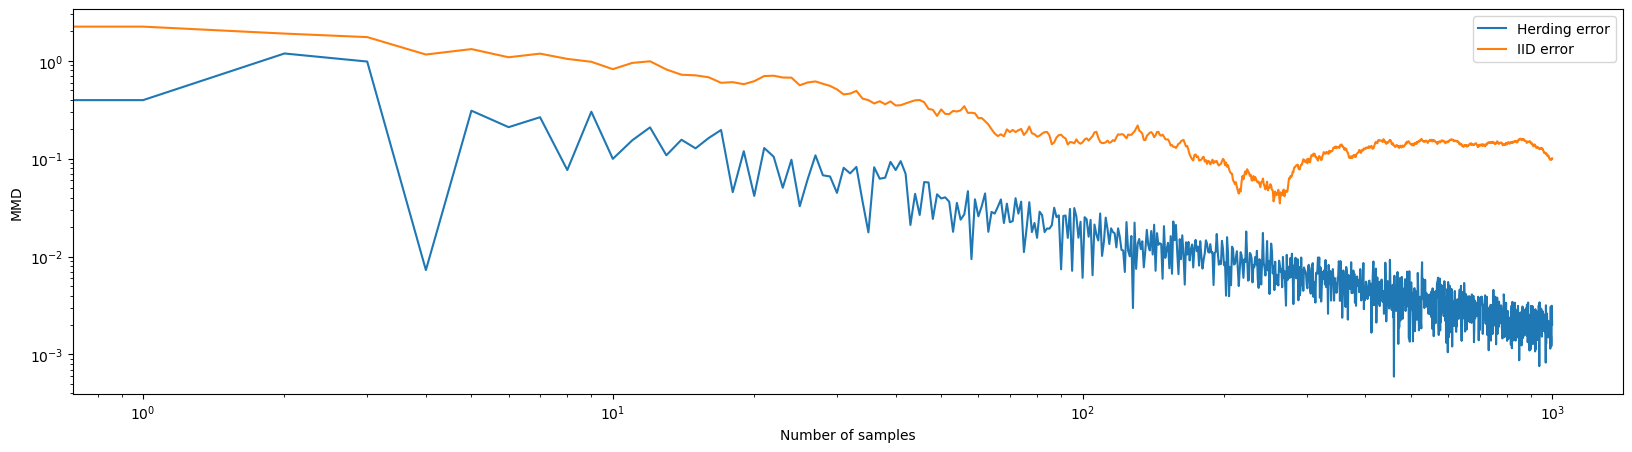

In [22]:
first = 1000

# Plot MMD
plt.figure(figsize = (20, 5))
plt.plot(herd_error[0, :first].mean(axis = 0), label = 'Herding error')
plt.plot(iid_error[0, :,:first].mean(axis = 0), label = 'IID error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('MMD')
plt.legend()
plt.show()

# Two-dimensional

## Generate data

In [29]:
probs = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
mus = np.array( ([ -2, -2 ], [ -1, -1 ], [ 0, 0], [ 1, 1 ], [ 2, 2 ] ) )
covs = np.zeros((probs.shape[0], 2, 2))
for i in range(probs.shape[0]):
    #A = np.random.rand(2, 2)
    #covs[i, :, :] = np.dot(A, A.T)
    covs[i, :, :] = np.array([[0.1, 0], [0, 0.1]])

D = gmm_sample(probs, mus, covs, 10000)

m = 75
x = np.linspace(D[:, 0].min(), D[:, 0].max(), m)
y = np.linspace(D[:, 1].min(), D[:, 1].max(), m)
X, Y = np.meshgrid(x, y)
f = np.zeros( (m, m) )
for i in tqdm(range(m)):
    for j in range(m):
        f[i, j] = gmm_density(np.array([X[i, j], Y[i, j]]), probs, mus, covs)

  0%|          | 0/75 [00:00<?, ?it/s]

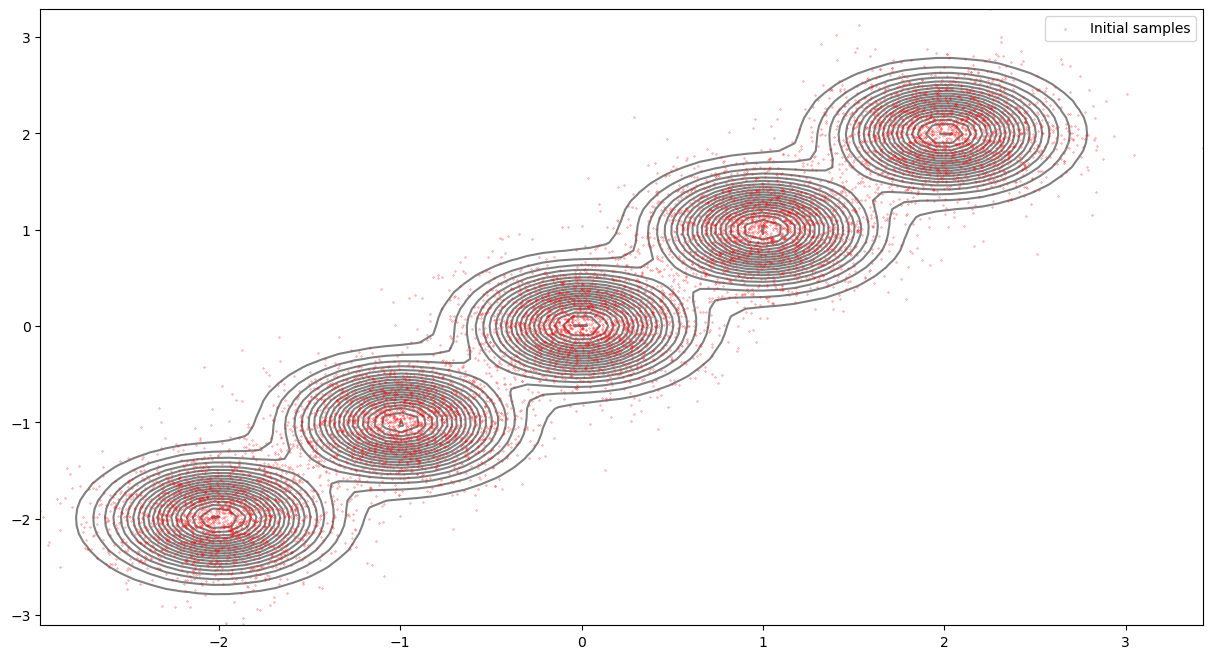

In [30]:
plt.figure(figsize = (15, 8))
N = 25
blackcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gray", "gray"])
plt.contour(X, Y, f, N, cmap = blackcmap, zorder = 1)
plt.scatter(D[:, 0], D[:, 1], s = 1, color = 'red', marker = 'x', label = 'Initial samples', zorder = 2, alpha = 0.25)
plt.legend()
plt.show()

## Run Kernel herding

In [31]:
lengthscale = 0.5
kernel = Gaussian(lengthscale)

kh = KernelHerding(D, kernel)

In [32]:
# method = ('local' , False)
method = ('global', 'BFGS', 10)

def linear(x):
    return x

def square(x):
    return x**2

def cube(x):
    return x**3

#def sin(x):
#    return np.sin(np.linalg.norm(x, axis = 0))

error_funcs = [linear, square, cube]

runs = 5
M = 1000
herd_error = np.zeros((len(error_funcs), runs, M))
iid_error = np.zeros((len(error_funcs),runs, D.shape[0]))
for i in range(runs):
    # Build coreset
    kh.reset()
    kh.herd(M, method)
    for j, func in enumerate(error_funcs):
        # Compute errors
        herd_error[j, i, :] = kh.compute_herd_error(func)
        iid_error[j, i, :] = kh.compute_iid_error(func)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Plot results

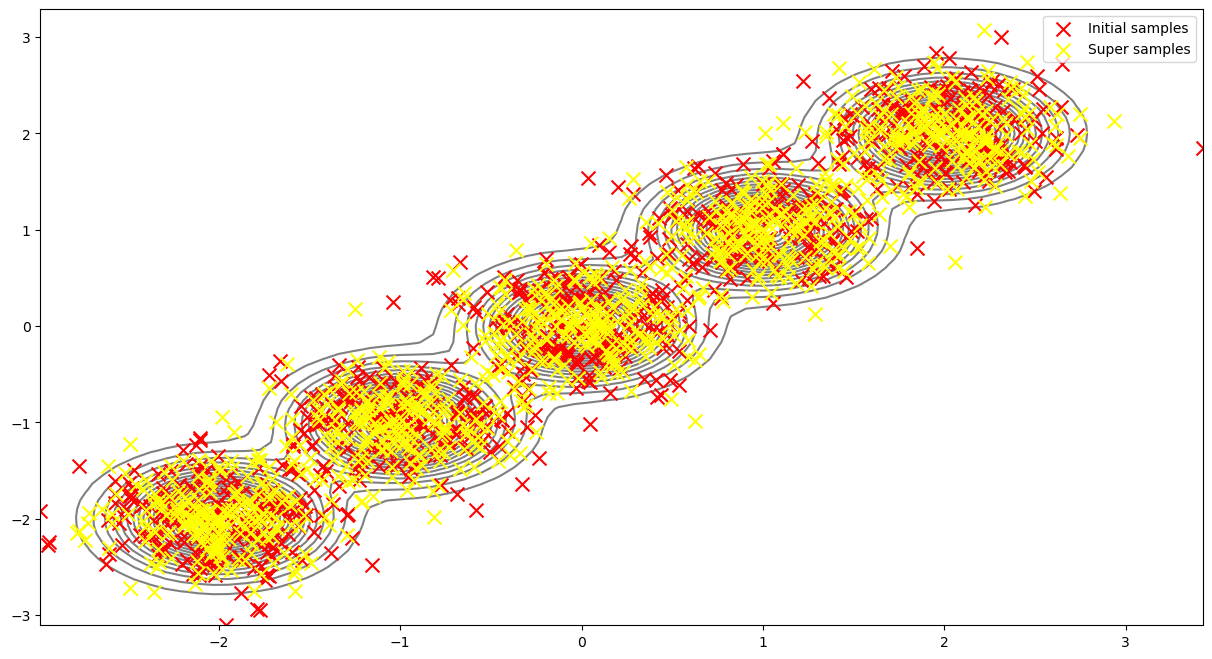

In [37]:
first = 1000

plt.figure(figsize = (15, 8))
N = 25
blackcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gray", "gray"])
plt.contour(X, Y, f, N, cmap = blackcmap, zorder = 1)
plt.scatter(D[:first, 0], D[:first, 1], s = 100, color = 'red', marker = 'x', label = 'Initial samples', zorder = 2)
plt.scatter(kh.super_samples[:first, 0], kh.super_samples[:first, 1], s = 100, marker = 'x', color = 'yellow', label = 'Super samples', zorder = 3)

plt.legend()
plt.show()

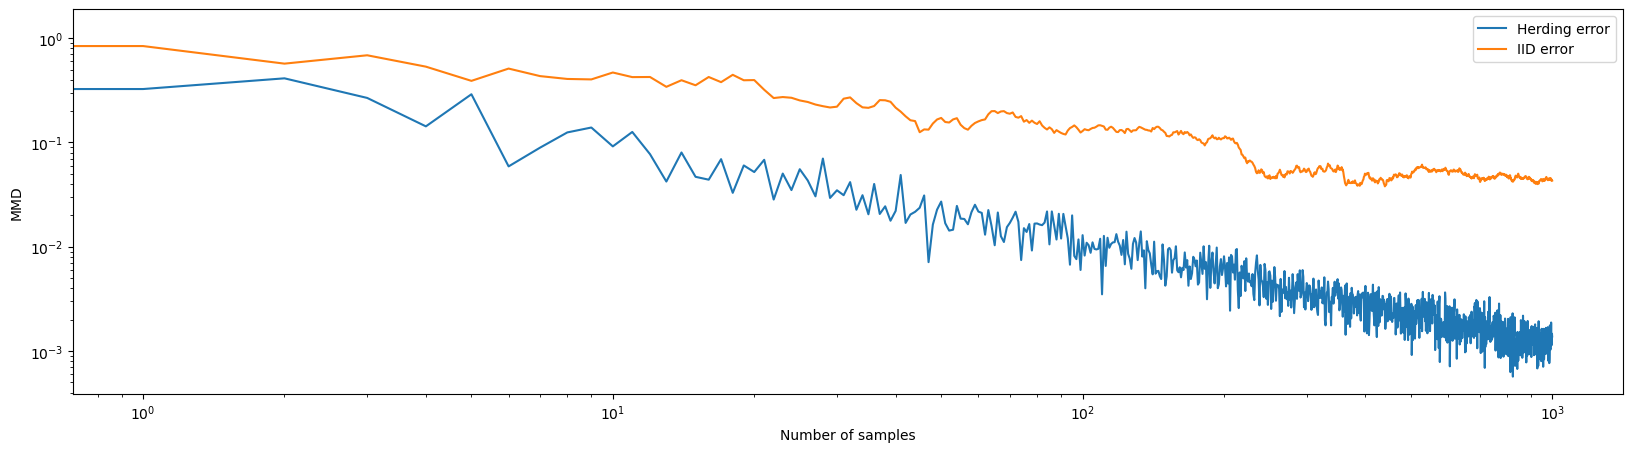

In [39]:
first = 1000

# Plot MMD
plt.figure(figsize = (20, 5))
plt.plot(herd_error[0, :,:first].mean(axis = 0), label = 'Herding error')
plt.plot(iid_error[0, :,:first].mean(axis = 0), label = 'IID error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('MMD')
plt.legend()
plt.show()

# Random two-dimensional example

# Generate data

In [43]:
components = 20
#probs = np.random.uniform(0, 1, components)
probs = np.ones(components)
probs /= probs.sum()

mus = np.random.rand(components, 2) * 12.5
covs = np.zeros((probs.shape[0], 2, 2))
for i in range(probs.shape[0]):
    covs[i, :, :] = np.eye(2) / np.random.uniform(1, 10)

D = gmm_sample(probs, mus, covs, 10000)

In [44]:
m = 100
x = np.linspace(D[:, 0].min(), D[:, 0].max(), m)
y = np.linspace(D[:, 1].min(), D[:, 1].max(), m)
X, Y = np.meshgrid(x, y)
f = np.zeros( (m, m) )
for i in tqdm(range(m)):
    for j in range(m):
        f[i, j] = gmm_density(np.array([X[i, j], Y[i, j]]), probs, mus, covs)

  0%|          | 0/100 [00:00<?, ?it/s]

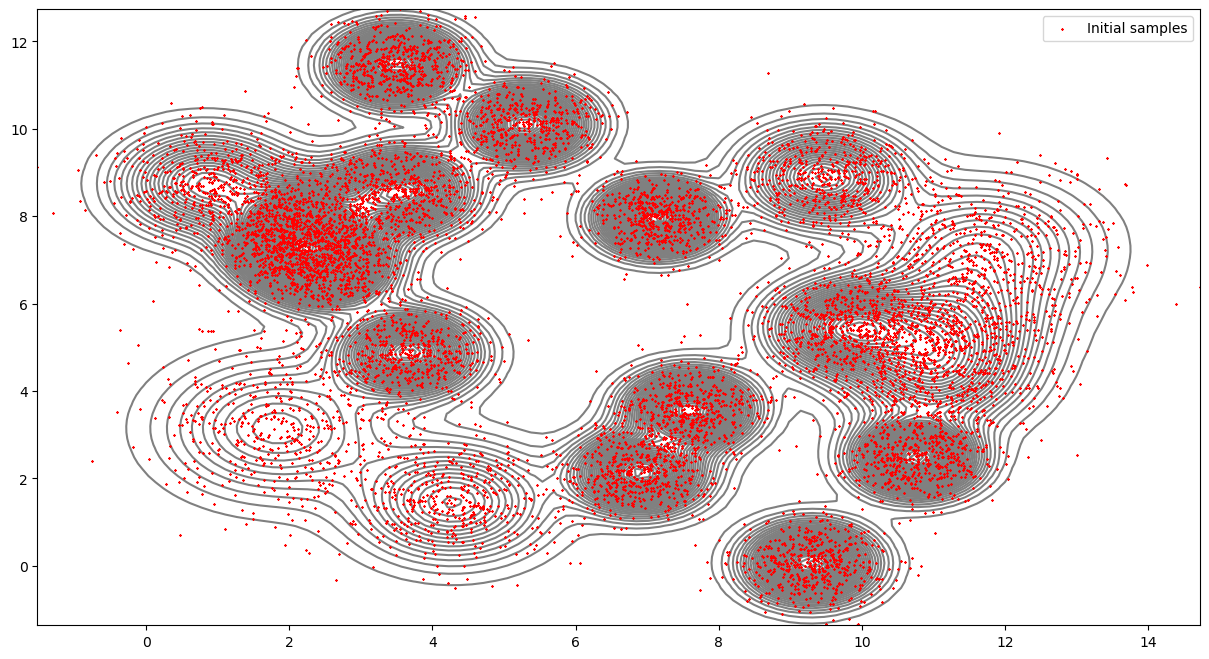

In [46]:
plt.figure(figsize = (15, 8))
N = 100
blackcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gray", "gray"])
plt.contour(X, Y, f, N, cmap = blackcmap, zorder = 1)
plt.scatter(D[:, 0], D[:, 1], s = 1, color = 'red', marker = 'x', label = 'Initial samples', zorder = 2)
plt.legend()
plt.show()

## Run Kernel herding

In [47]:
lengthscale = 0.5
kernel = Gaussian(lengthscale)

kh = KernelHerding(D, kernel)

In [49]:
# method = ('local' , False)
method = ('global', 'BFGS', 25)

def linear(x):
    return x

def square(x):
    return x**2

def cube(x):
    return x**3

#def sin(x):
#    return np.sin(np.linalg.norm(x, axis = 0))

error_funcs = [linear, square, cube]

runs = 5
M = 1000
herd_error = np.zeros((len(error_funcs), runs, M))
iid_error = np.zeros((len(error_funcs),runs, D.shape[0]))
for i in range(runs):
    # Build coreset
    kh.reset()
    kh.herd(M, method)
    for j, func in enumerate(error_funcs):
        # Compute errors
        herd_error[j, i, :] = kh.compute_herd_error(func)
        iid_error[j, i, :] = kh.compute_iid_error(func)
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Plot results

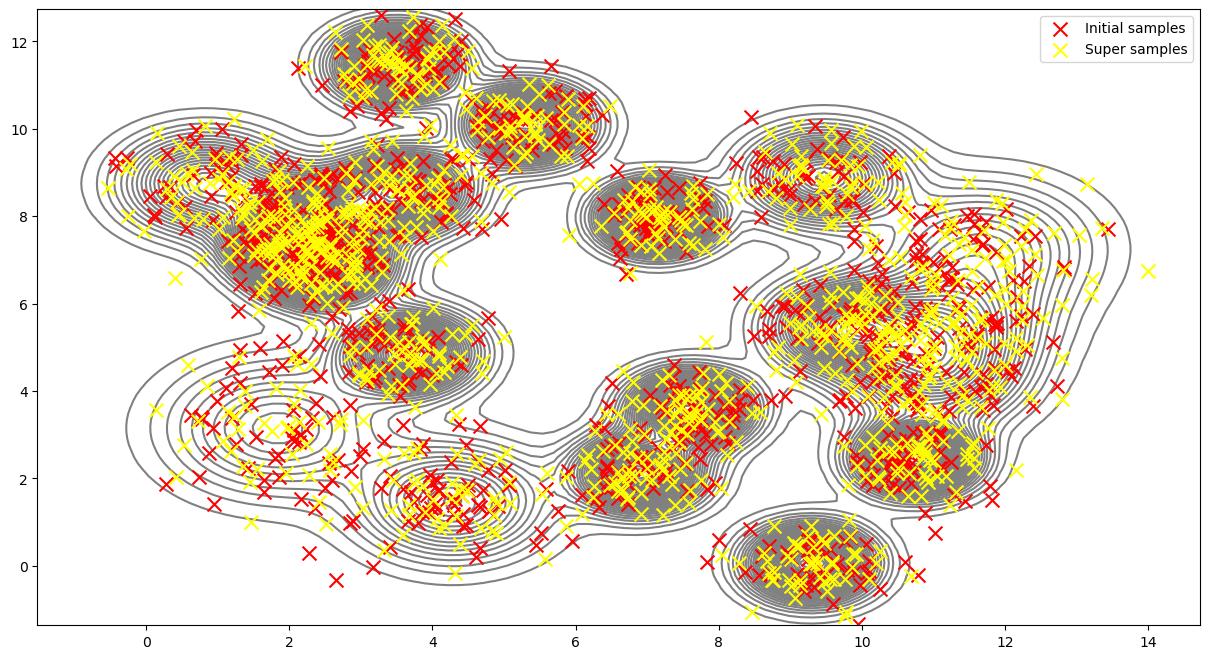

In [52]:
first = 1000

plt.figure(figsize = (15, 8))
N = 100
blackcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gray", "gray"])
plt.contour(X, Y, f, N, cmap = blackcmap, zorder = 1)
plt.scatter(D[:first, 0], D[:first, 1], s = 100, color = 'red', marker = 'x', label = 'Initial samples', zorder = 2)
plt.scatter(kh.super_samples[:first, 0], kh.super_samples[:first, 1], s = 100, marker = 'x', color = 'yellow', label = 'Super samples', zorder = 3)
plt.legend()
plt.show()

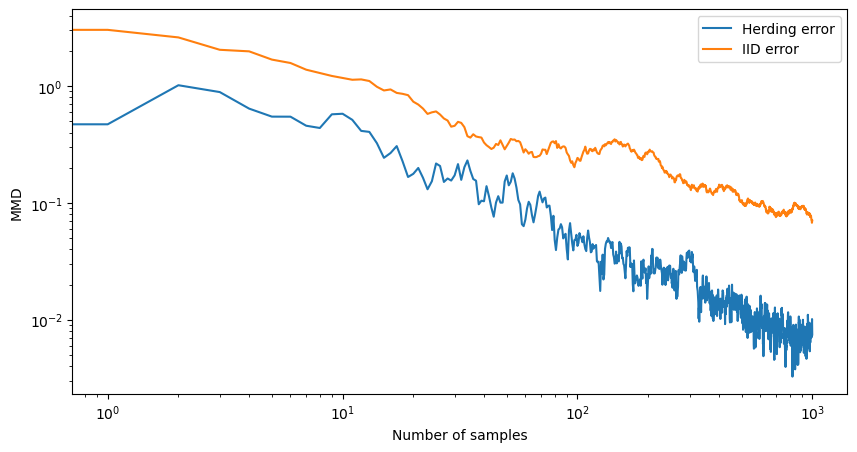

In [55]:
first = 1000

# Plot MMD
plt.figure(figsize = (10, 5))
plt.plot(herd_error[0, :, :first].mean(axis = 0), label = 'Herding error')
plt.plot(iid_error[0, :, :first].mean(axis = 0), label = 'IID error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('MMD')
plt.legend()
plt.show()

# High dimensional example

## Data generation

In [30]:
dimension = 1000
components = 20
#probs = np.random.uniform(0, 1, components)
probs = np.ones(components)
probs /= probs.sum()
#print(f' GMM sampling probabilities:\n {probs}')

mus = np.random.rand(components, dimension) * 12.5
#print(f' GMM sampling means:\n {mus}')

covs = np.zeros((probs.shape[0], dimension, dimension))
for i in range(probs.shape[0]):
    covs[i, :, :] = np.eye(dimension)/ np.random.uniform(1, 10)
#print(f' GMM sampling covariances:\n {covs}')

D = gmm_sample(probs, mus, covs, 10000)

## Run Kernel herding

In [31]:
lengthscale = 0.5
kernel = Gaussian(lengthscale)

kh = KernelHerding(D, kernel)

### Normal global

In [ ]:
# method = ('local' , False)
method = ('global', 'BFGS', 25)

def linear(x):
    return x

def square(x):
    return x**2

def cube(x):
    return x**3

#def sin(x):
#    return np.sin(np.linalg.norm(x, axis = 0))

error_funcs = [linear, square, cube]

runs = 3
M = 1000
herd_error = np.zeros((len(error_funcs), runs, M))
for i in range(runs):
    # Build coreset
    kh.reset()
    kh.herd(M, method)
    for j, func in enumerate(error_funcs):
        # Compute errors
        herd_error[j, i, :] = kh.compute_herd_error(func)   


### PCA global

In [44]:
method = method = ('global_pca', 0.95, 'BFGS', 10)

def linear(x):
    return x

def square(x):
    return x**2

def cube(x):
    return x**3

#def sin(x):
#    return np.sin(np.linalg.norm(x, axis = 0))

error_funcs = [linear, square, cube]

runs = 5
M = 1000
herd_pca_error = np.zeros((len(error_funcs), runs, M))
iid_error = np.zeros((len(error_funcs),runs, D.shape[0]))
for i in range(runs):
    # Build coreset
    kh.reset()
    kh.herd(M, method)
    for j, func in enumerate(error_funcs):
        # Compute errors
        herd_pca_error[j, i, :] = kh.compute_herd_error(func)
        iid_error[j, i, :] = kh.compute_iid_error(func)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Local

In [43]:
method = method = ('local', True)

def linear(x):
    return x

def square(x):
    return x**2

def cube(x):
    return x**3

#def sin(x):
#    return np.sin(np.linalg.norm(x, axis = 0))

error_funcs = [linear, square, cube]

runs = 5
M = 1000
herd_local_error = np.zeros((len(error_funcs), runs, M))
for i in range(runs):
    # Build coreset
    kh.reset()
    kh.herd(M, method)
    for j, func in enumerate(error_funcs):
        # Compute errors
        herd_local_error[j, i, :] = kh.compute_herd_error(func)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Plot results

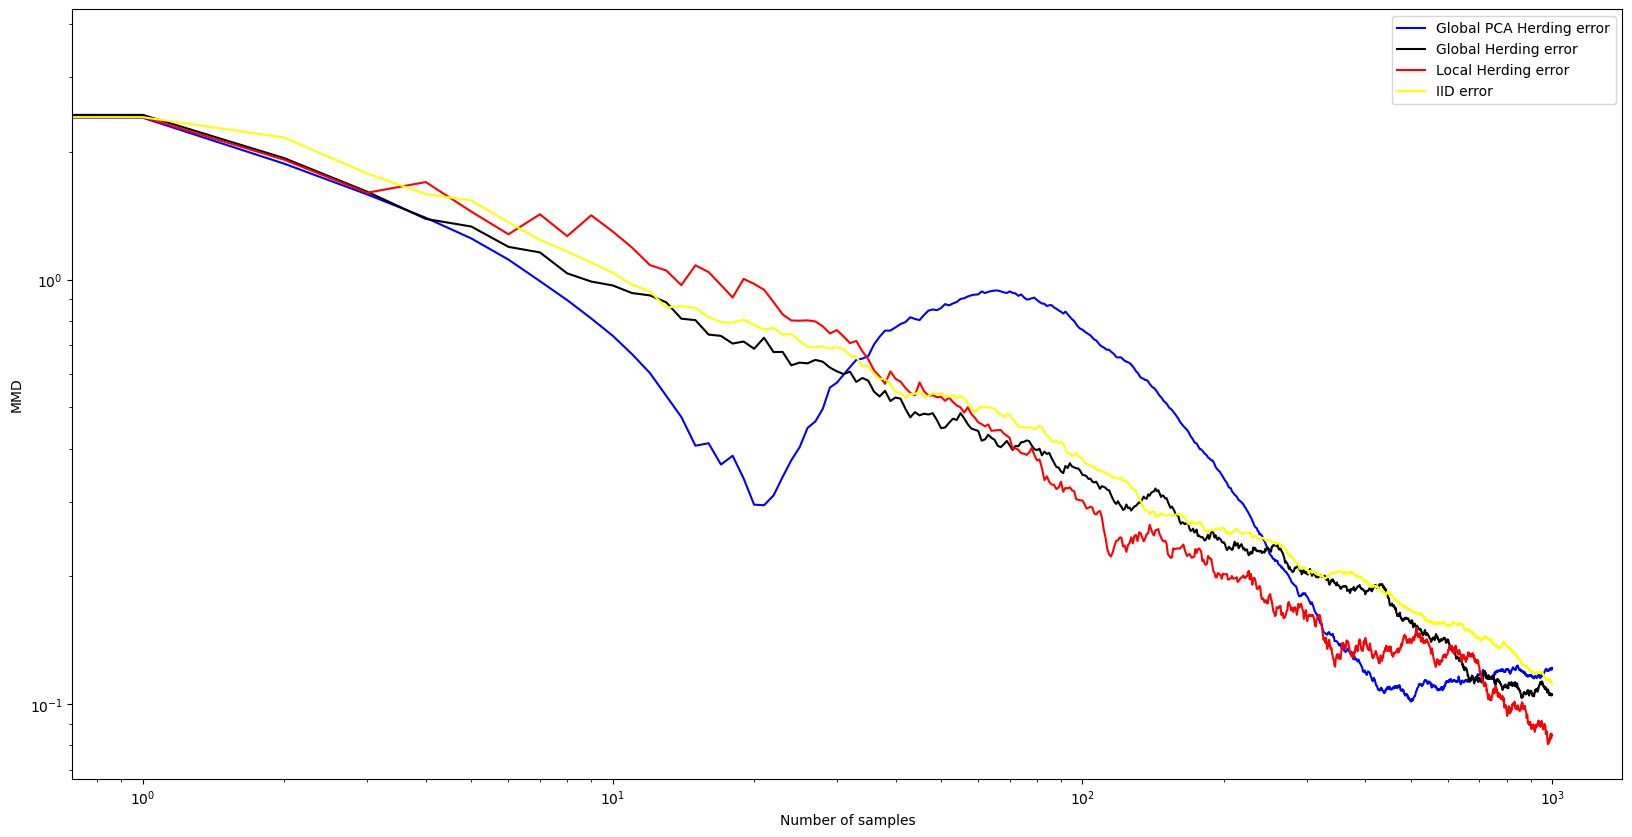

In [59]:
first = 1000

# Plot MMD
plt.figure(figsize = (20, 10))
plt.plot(herd_pca_error[0, :,:first].mean(axis = 0), label = 'Global PCA Herding error', color = 'blue')
plt.plot(herd_error[0, 0:2, :first].mean(axis = 0), label = 'Global Herding error', color = 'black')
plt.plot(herd_local_error[0, :, :first].mean(axis = 0), label = 'Local Herding error', color = 'red')
plt.plot(iid_error[0, :, :first].mean(axis = 0), label = 'IID error', color = 'yellow')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('MMD')
plt.legend()
plt.show()